1st run through of data with simple models to do data exploration:
- linear regression
- log regression
- log linear

Maybe seperate notebook for indepth graph analysis 

In [1]:
import pandas as pd
import numpy as np 
import random
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import learning_curve,  cross_val_score
from sklearn.metrics import classification_report, confusion_matrix  
#plotting related things 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,  classification_report,  roc_curve, roc_auc_score
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
'''
Load arrays for preping DF: 

For structure of npz:
arr one is DNA seq, arr two is label encoding, arr three is one hot 

Afterwards combine both 1 hot encoding
'''
RM_alt_seq = np.load('RM_alt_seq_Complete_V3.npz')
RM_pos_guide = np.load('RM_pos_guide_Complete_V3.npz')
RM_ref_seq = np.load('RM_ref_seq_Complete_V3.npz')

RM_alt_seq_onehot =   RM_alt_seq['arr_2']
RM_pos_guide_onehot = RM_pos_guide['arr_2']
RM_ref_seq_onehot = RM_ref_seq['arr_2']

print('shapes for alt seq, post guide,  ref:',
      RM_alt_seq_onehot.shape, RM_pos_guide_onehot.shape, RM_ref_seq_onehot.shape)

#stack arrays via cols
RM_stacks = np.column_stack((RM_alt_seq_onehot, RM_pos_guide_onehot,
                             RM_ref_seq_onehot))

Y_labels= np.load('RM_var_DF_V3.npy')
print('RM stack shape', RM_stacks.shape)
print('y label shape', Y_labels.shape)

shapes for alt seq, post guide,  ref: (23397, 81) (23397, 20) (23397, 81)
RM stack shape (23397, 182)
y label shape (23397,)


In [3]:
# 3. Split the data & targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(RM_stacks, Y_labels,
                                                    test_size=0.2, random_state=0)

print("Shape of  X_train dataset: ", X_train.shape)
print("Shape of  y_train dataset: ", y_train.shape)
print("Shape of  X_test dataset: ", X_test.shape)
print("Shape of  y_test dataset: ", y_test.shape)

print(" train counts of label '1': {}", (sum(y_train==1)))
print("train counts of label '0': {}", (sum(y_train==0)))

print(" test counts of label '1': {}", (sum(y_test==1)))
print("test counts of label '0': {}", (sum(y_test==0)))

Shape of  X_train dataset:  (18717, 182)
Shape of  y_train dataset:  (18717,)
Shape of  X_test dataset:  (4680, 182)
Shape of  y_test dataset:  (4680,)
 train counts of label '1': {} 249
train counts of label '0': {} 18468
 test counts of label '1': {} 57
test counts of label '0': {} 4623


In [4]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', class_weight='balanced') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4935897435897436


In [45]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.010579771476936098
Recall: 0.43859649122807015


In [47]:
#trying diff C 
#Create a svm Classifier
clf_10 = svm.SVC(kernel='linear', C=10, class_weight='balanced') # Linear Kernel

#Train the model using the training sets
clf_10.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_10.predict(X_test)

In [48]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.4935897435897436
Precision: 0.010579771476936098
Recall: 0.43859649122807015


#  RBF

In [53]:
rbf_svc = svm.SVC(kernel='rbf', class_weight='balanced', random_state= True)

#Train the model using the training sets
rbf_svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rbf_svc = rbf_svc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.4935897435897436
Precision: 0.010579771476936098
Recall: 0.43859649122807015


# Trying with Smote 

In [4]:
print("Before OverSampling, counts of label '1': {}", (sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}", (sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}", (sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}",(sum(y_train_res==0)))


Before OverSampling, counts of label '1': {} 249
Before OverSampling, counts of label '0': {} 18468
After OverSampling, the shape of train_X: (36936, 182)
After OverSampling, the shape of train_y: (36936,) 

After OverSampling, counts of label '1': {} 18468
After OverSampling, counts of label '0': {} 18468


# Model1 

In [6]:
#Create a svm Classifier
clf_smote = svm.SVC(kernel='linear', class_weight='balanced', probability=True) 

#Train the model using the training sets
clf_smote.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred_smote = clf_smote.predict(X_test)

In [7]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_smote))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_smote))

Accuracy: 0.38782051282051283
Precision: 0.011821974965229486
Recall: 0.5964912280701754


In [8]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.39      0.55      4623
           1       0.01      0.60      0.02        57

   micro avg       0.39      0.39      0.39      4680
   macro avg       0.50      0.49      0.29      4680
weighted avg       0.98      0.39      0.55      4680



In [9]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr


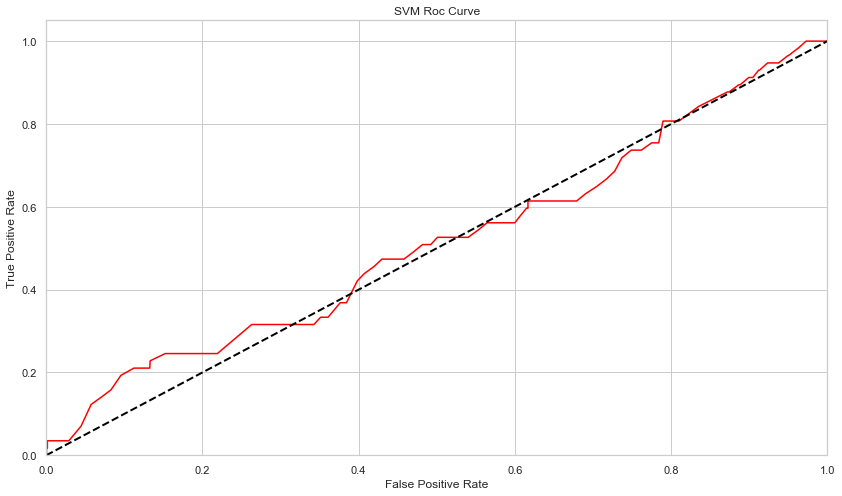

In [12]:
roc_svm = get_roc_curve(clf_smote, X_test, y_test)

fpr, tpr = roc_svm
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_svm)
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Roc Curve')
plt.show()

In [81]:
# is there some bias or variance problem ploting? -- examine learning curve
train_sizes, train_scores, test_scores = \
    learning_curve(clf_smote, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A

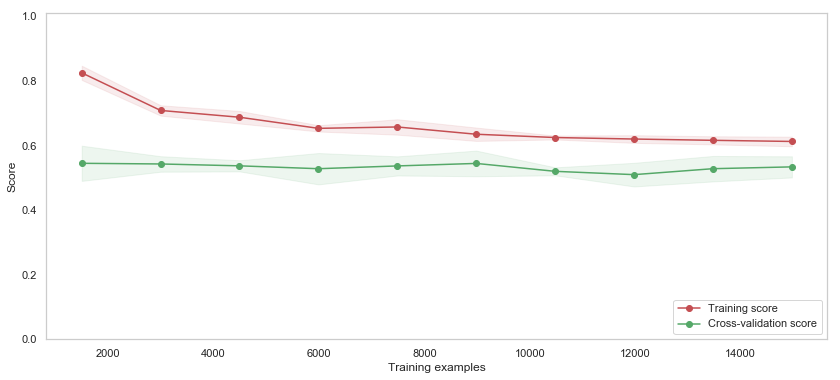

In [85]:
plot_learning_curve(X_train_res, y_train_res, train_sizes, 
                    train_scores, test_scores, ylim=(0.00, 1.01), figsize=(14,6))
plt.show()

# SVM II


In [13]:
#Create a svm Classifier
clf_smote_II = svm.SVC(kernel='linear', class_weight='balanced', probability=True, C= .01) 

#Train the model using the training sets
clf_smote_II.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred_smote = clf_smote_II.predict(X_test)

In [16]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_smote))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


confusion_matrix = confusion_matrix(y_test, y_pred_smote)
print(confusion_matrix)

Accuracy: 0.3076923076923077
Precision: 0.011059907834101382
Recall: 0.631578947368421
              precision    recall  f1-score   support

           0       0.99      0.30      0.46      4623
           1       0.01      0.63      0.02        57

   micro avg       0.31      0.31      0.31      4680
   macro avg       0.50      0.47      0.24      4680
weighted avg       0.97      0.31      0.46      4680

[[1404 3219]
 [  21   36]]


In [21]:
roc_svm_II = get_roc_curve(clf_smote_II, X_test, y_test)


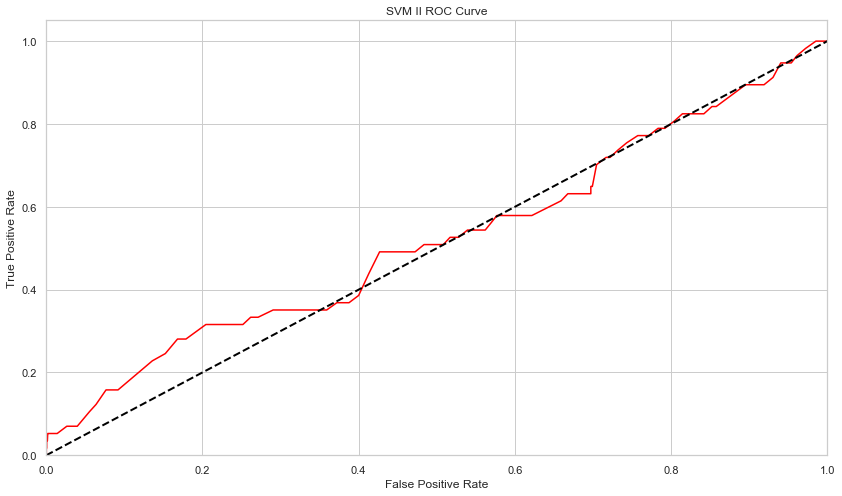

In [24]:
fpr, tpr = roc_svm_II
#plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_svm_II)
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM II ROC Curve')
plt.show()

# SVM III

In [27]:
#Create a svm Classifier
clf_smote_III = svm.SVC(kernel='linear', class_weight='balanced', probability=True, C= .001) 

#Train the model using the training sets
clf_smote_III.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred_smote = clf_smote_III.predict(X_test)

In [28]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_smote))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))



Accuracy: 0.5668803418803419
Precision: 0.013820335636722606
Recall: 0.49122807017543857
              precision    recall  f1-score   support

           0       0.99      0.57      0.72      4623
           1       0.01      0.49      0.03        57

   micro avg       0.57      0.57      0.57      4680
   macro avg       0.50      0.53      0.37      4680
weighted avg       0.98      0.57      0.71      4680



In [29]:
roc_svm_III = get_roc_curve(clf_smote_III, X_test, y_test)
fpr, tpr = roc_svm_III
#plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_svm_II)
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM II ROC Curve')
plt.show()

NameError: name 'get_roc_curve' is not defined

#  Trying SVM with different kernals

# SVM Poly

In [11]:
#Create a svm Classifier
clf_smote_IV = svm.SVC(kernel='poly', degree=8,
                       class_weight='balanced', probability=True, C= .001) 

#Train the model using the training sets
clf_smote_IV.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred_smote_IV = clf_smote_IV.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote_IV))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_smote_IV))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_smote_IV))
print(classification_report(y_test, y_pred_smote_IV))


Accuracy: 0.6651709401709401
Precision: 0.01164294954721863
Recall: 0.3157894736842105
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      4623
           1       0.01      0.32      0.02        57

   micro avg       0.67      0.67      0.67      4680
   macro avg       0.50      0.49      0.41      4680
weighted avg       0.98      0.67      0.79      4680



In [17]:

print(confusion_matrix(y_test, y_pred_smote_IV))    

[[3095 1528]
 [  39   18]]


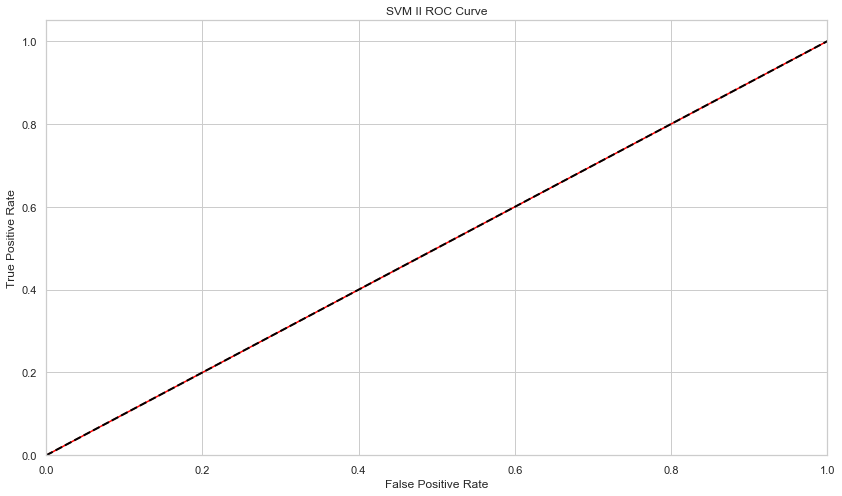

In [18]:
roc_svm_III = get_roc_curve(clf_smote_IV, X_test, y_test)
fpr, tpr = roc_svm_III
#plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_svm_II)
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM II ROC Curve')
plt.show()

# Gaussian ~ RBF

In [5]:
from sklearn.svm import SVC  
svclassifier = svm.SVC(kernel='rbf',probability=True)  
svclassifier.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred_smote_VI = svclassifier.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote_VI))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_smote_VI))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_smote_VI))
print(classification_report(y_test, y_pred_smote_VI))
print(confusion_matrix(y_test, y_pred_smote_VI))   

Accuracy: 0.3096153846153846
Precision: 0.011090573012939002
Recall: 0.631578947368421
              precision    recall  f1-score   support

           0       0.99      0.31      0.47      4623
           1       0.01      0.63      0.02        57

   micro avg       0.31      0.31      0.31      4680
   macro avg       0.50      0.47      0.24      4680
weighted avg       0.97      0.31      0.46      4680

[[1413 3210]
 [  21   36]]


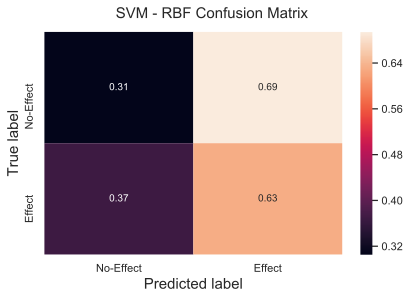

In [17]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred_smote_VI)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized, annot=True, xticklabels=('No-Effect', 'Effect'), yticklabels=('No-Effect', 'Effect'))
plt.ylabel('True label', fontsize =15)
plt.xlabel('Predicted label', fontsize =15)
#plt.annotate((0.25, 0.25),(0.25, 0.25))
plt.figtext(.5,.99,'SVM - RBF Confusion Matrix', fontsize=15, ha='center')
plt.tight_layout()

# SVM -- Sigmoid

In [29]:
svclassifier_sigmoid = svm.SVC(kernel='sigmoid', probability=True)  
svclassifier_sigmoid.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred_smote_VII = svclassifier_sigmoid.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote_VII))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_smote_VII))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_smote_VII))
print(classification_report(y_test, y_pred_smote_VII))
print(confusion_matrix(y_test, y_pred_smote_VII))  
print(classification_report(y_test, y_pred_smote_VII))  

Accuracy: 0.3072649572649573
Precision: 0.01105311636475284
Recall: 0.631578947368421
              precision    recall  f1-score   support

           0       0.99      0.30      0.46      4623
           1       0.01      0.63      0.02        57

   micro avg       0.31      0.31      0.31      4680
   macro avg       0.50      0.47      0.24      4680
weighted avg       0.97      0.31      0.46      4680

[[1402 3221]
 [  21   36]]
              precision    recall  f1-score   support

           0       0.99      0.30      0.46      4623
           1       0.01      0.63      0.02        57

   micro avg       0.31      0.31      0.31      4680
   macro avg       0.50      0.47      0.24      4680
weighted avg       0.97      0.31      0.46      4680



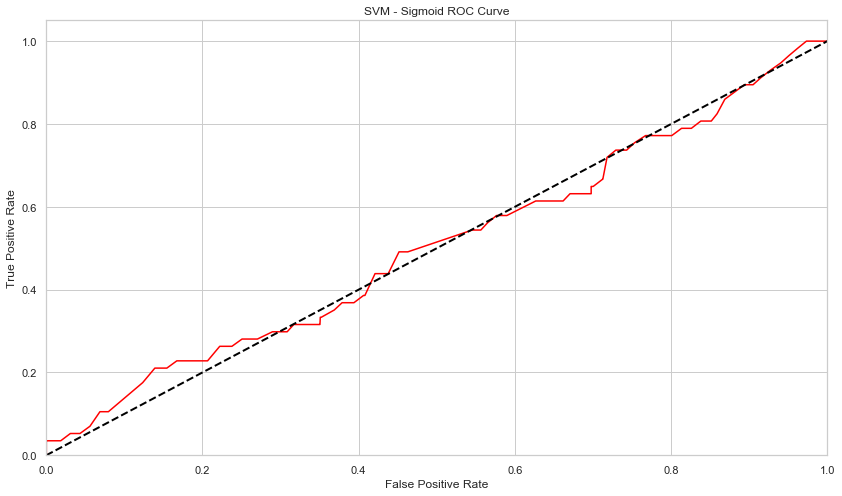

In [31]:
roc_svm_III = get_roc_curve(svclassifier_sigmoid, X_test, y_test)
fpr, tpr = roc_svm_III
#plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_svm_II)
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - Sigmoid ROC Curve')
plt.show()

In [6]:
SVC?

Object `SVC` not found.
